In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r'E:\5th sem\ML\lab\Custom_CNN_Features.csv')
df.head()

,Filename,Label,f0,f1,f2,f3,f4,f5,f6,f7,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
0,1.png,2,50.557468,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,316.271667,0.0,239.577011,277.834534,205.776398,0.0,0.0,0.0,0.0,91.438698
1,10.jpg.png,2,125.256027,0.0,0.0,0.0,0.0,0.0,48.989120,0,...,1317.333740,0.0,1000.075012,1118.496948,1030.366699,0.0,0.0,0.0,0.0,297.483124
2,10.png,2,50.160606,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,330.470978,0.0,251.886398,288.062134,220.889481,0.0,0.0,0.0,0.0,93.795654
3,100.png,2,63.720730,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,442.839233,0.0,345.145599,389.100678,304.433990,0.0,0.0,0.0,0.0,117.381721
4,10091.jpg,2,64.484604,0.0,0.0,0.0,0.0,0.0,37.368713,0,...,835.147400,0.0,649.643616,693.101868,690.640564,0.0,0.0,0.0,0.0,159.916016


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Columns: 202 entries, Filename to f199
dtypes: float64(174), int64(27), object(1)
memory usage: 5.0+ MB


In [7]:
df.describe()

,Label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
count,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.0,3253.000000,...,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000
mean,0.849062,17.516938,57.919104,112.822180,170.829473,17.606476,141.614480,11.035532,0.0,214.312125,...,171.788722,0.000105,156.541866,140.697822,175.032922,137.520308,111.645797,0.830283,71.926779,75.925521
std,0.689245,54.948034,93.672074,96.561850,124.512873,35.626627,99.128478,20.554964,0.0,738.811309,...,549.640363,0.005983,420.492050,471.266997,415.644562,149.519860,105.996694,3.439972,112.191866,135.273056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,46.988506,85.638191,0.000000,76.372185,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.641617,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,93.278381,160.636246,0.000000,132.048889,0.000000,0.0,0.000000,...,0.000000,0.000000,35.827831,0.000000,59.605762,87.407989,79.497665,0.000000,0.000000,0.000000
75%,1.000000,0.000000,117.704697,159.855179,248.145508,12.160916,207.697266,16.175734,0.0,0.000000,...,52.716290,0.000000,98.118843,13.611436,139.699936,225.686981,175.588440,0.000000,164.374664,107.249413
max,2.000000,781.789490,459.207794,536.879639,760.753845,202.598496,587.289551,217.982010,0.0,10129.193360,...,7535.423828,0.341233,5972.883789,6563.629883,5749.376465,750.316284,571.680176,31.048813,505.643402,1758.735840


In [8]:
df['Label'].nunique()

3

# A1: Merge your train & test sets and remove the class labels. Use k-means algorithm with k = 3 or 5 (based on your dataset) to form the clusters.

Merge your train & test sets and remove the class labels. Use k-means algorithm with k = 3 or 5 (based on your dataset) to form the clusters.

In [12]:
from sklearn.model_selection import train_test_split

In [9]:
df.columns

Index(['Filename', 'Label', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7',
       ...
       'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198',
       'f199'],
      dtype='object', length=202)

In [10]:
X = df[df.columns[2:]]
y = df['Label']

In [13]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [14]:
from sklearn.cluster import KMeans

In [15]:
X = np.concatenate((X_train, X_test), axis=0)

In [16]:
y = np.concatenate((y_train, y_test), axis=0)

### k = 3

In [17]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
cluster_labels = kmeans.labels_
print(cluster_labels)

c:\Users\SANJAY BAITHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 0 0 0]


### k = 5

In [18]:
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
cluster_labels = kmeans.labels_
print(cluster_labels)

[3 0 3 ... 0 0 0]


c:\Users\SANJAY BAITHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# A2: Determine the ideal k value for your dataset. Determine the clusters for a range of k ϵ [1,31]. Use elbow method to determine the ideal value of k based on average Euclidean distance from cluster center

c:\Users\SANJAY BAITHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SANJAY BAITHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SANJAY BAITHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SANJAY BAITHA\AppData\Local\Programs\Python\Python31

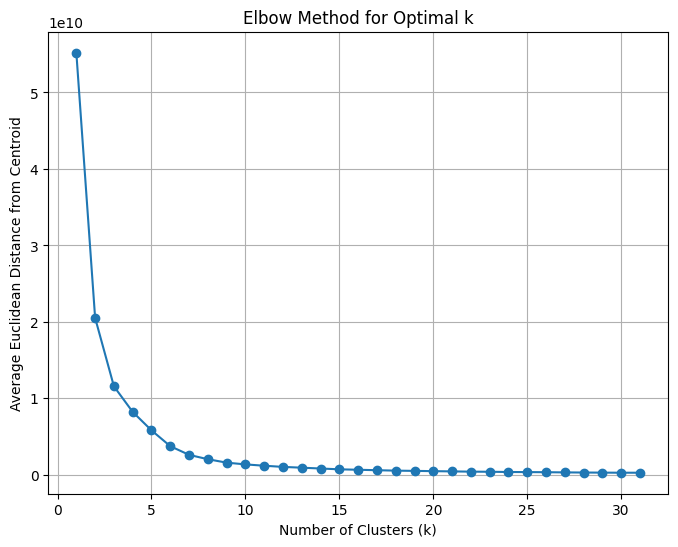

In [19]:
k_values = range(1, 32)
distortions = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_) 

plt.figure(figsize=(8, 6))
plt.plot(k_values, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance from Centroid')
plt.grid(True)
plt.show()

# A3: Use Agglomerative Clustering for hierarchical clustering of your data. Plot the dendrogram to visualize the clusters

Use AgglomerativeClusteringfor hierarchical clustering of your data. Plot the dendrogram to visualize the clusters.

In [20]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

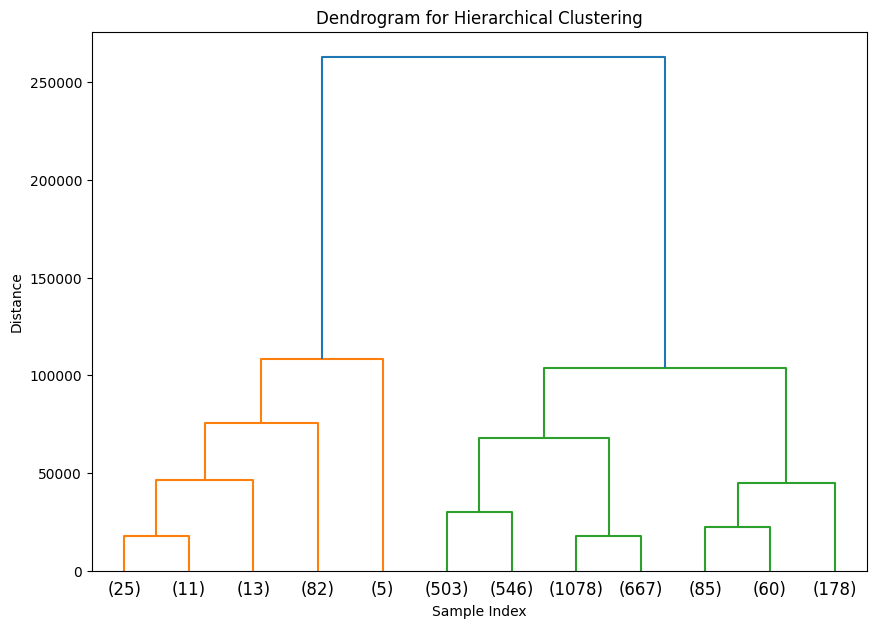

In [21]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(X)

linked = linkage(X, method='ward')  
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', truncate_mode='lastp', p=12)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# A4: Perform sequential feature selection algorithms for arriving at the optimal number of features needed for your dataset

In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector

ModuleNotFoundError: No module named 'mlxtend'

#A5:Perform PCA on your data set. Observe the variances along the principal components. Identify the features needed to capture 95% of data variance. Let’s say the number of features needed is K.

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA()
pca.fit(X)

PCA()

In [26]:
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

n_components = np.argmax(cumulative_var_ratio >= 0.95) + 1
variance_captured = cumulative_var_ratio[n_components - 1]

print(f"Number of components needed to capture 95% variance: {n_components}")
print(f"Variance captured by {n_components} components: {variance_captured:.4f}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

Number of components needed to capture 95% variance: 2
Variance captured by 2 components: 0.9906


# A5:Transform your data with the initial K PC’s. Calculate the accuracy using the transformed dataset

In [27]:
pca = PCA()
pca.fit(X_train)

cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_var_ratio >= 0.95) + 1

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
classifier = LogisticRegression()
classifier.fit(X_train_pca, y_train)

LogisticRegression()

In [30]:
accuracy = classifier.score(X_test_pca, y_test)
print(f"Accuracy using the transformed dataset: {accuracy:.4f}")

Accuracy using the transformed dataset: 0.9232
